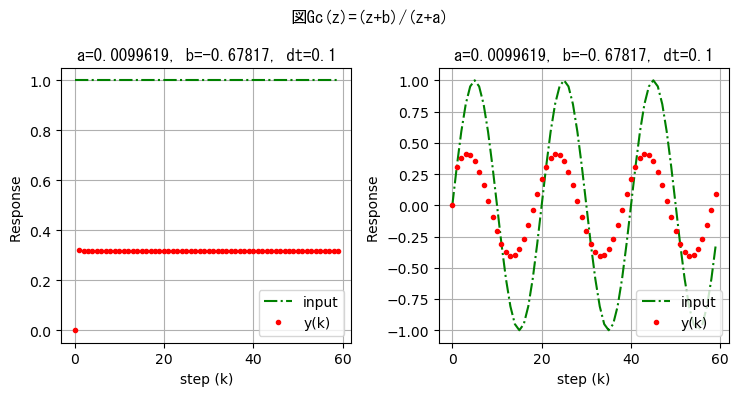

In [12]:
#digital control 
#デジタル制御　高橋安人
#
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as LA


##################### main ######################
knum=60 #サンプル数#
r1=np.zeros(knum) # input (step) 入力
r2=np.zeros(knum) # input (ramp) 入力
y1=np.zeros(knum) #respose for r1
y2=np.zeros(knum) #respose for r2
err=np.zeros(knum)

#*****************************
#   input parameter          *
#*****************************
Gain=1.0
# 制御アルゴリズム関数の応答はどんなものか確認する
# Gc[z]=(z+b)/(z+a)　,　|a|<1
# a,bを変化させ観察

################################################
#page87a　のH(z)=Kgain*(z+b)/(z+a)
###Case(a)
###a=0.72152,b=-0.57042,K=1.18,Kc=245
#Kgain=245.0
a=0.72152;b=-0.57042   #(a)
dt=0.1
################################################
###Case(b)
###a=0.0099619,b=-0.67817,K=0.395,Kc=81.6
#Kgain=81.6
a=0.0099619;b=-0.67817 #(b)
dt=0.1
##################&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
##################&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&

#dt=0.1 #sampling interval

T0=2 #周期1秒
w=2*np.pi/T0
# knum*dt:計測時間

# input 
for i in range(0,knum):
    r1[i]=1.0 #step input
    #r2[i]=i*Tsample #rump input0,T,2T,3T....
    r2[i]=np.sin(w*dt*i)
    #
#　y(k)を生成する。伝達関数の場合、(3-32)の方が分かり易い
# y1[k]=-(a*y1[k-1])+(r1[k]+b*r1[k-1])
#
for k in range(0,knum):
    if k==0: y1[k]=0.0; y2[k]=0.0
    else: y1[k]=-(a*y1[k-1])+(r1[k]+b*r1[k-1]);y2[k]=-(a*y2[k-1])+(r2[k]+b*r2[k-1])  
   
#誤差の計算
for k in range(0,knum):   
    err[k]=r1[k]-y1[k]
#

#########################################################
# PLOT
#########################################################
# Figure1
#########################################################
fig = plt.figure(figsize=(7.5, 4),tight_layout=True) # Figureの初期化(横ｘ縦)
# Create a figure of size 横x縦 inches, 100 dots per inch
plt.suptitle("図Gc(z)=(z+b)/(z+a)", fontname="MS Gothic")
t=np.arange(0,knum)
#########################################################
#                 subplot 1   step input                #
#########################################################
plt.subplot(121) 
plt.plot(t,r1,'-.g',label="input")  #input 
plt.plot(t,y1*Gain,'.r',label="y(k)")  # y(k)

#Ymax=6.0; Ymin=-4.0
#plt.ylim(Ymin,Ymax)
plt.ylabel("Response ")
plt.xlabel("step (k)")
#
Title_para="a="+str(a)+", b="+str(b)+", dt="+str(dt)
plt.title(""+Title_para, fontname="MS Gothic")
plt.legend(loc='lower right')
#plt.legend(loc='upper left')
plt.grid()
#########################################################
#                 subplot 2    ramp input               #
#########################################################
plt.subplot(122) #　
plt.plot(t,r2,'-.g',label="input")  #input 
plt.plot(t,y2*Gain,'.r',label="y(k)")  # y(k)
#ax1.plot(t,err*5,'-*k',label="errorx5") # 5倍に拡大表示した！
#
#Ymax=1.0; Ymin=0.0
#plt.ylim(Ymin,Ymax,2.)
plt.ylabel("Response ")
plt.xlabel("step (k)")
#
Title_para="a="+str(a)+", b="+str(b)+", dt="+str(dt)
plt.title(""+Title_para, fontname="MS Gothic")
plt.title(""+Title_para, fontname="MS Gothic")
plt.legend(loc='lower right')
plt.grid()


#
# 表示
plt.show()    

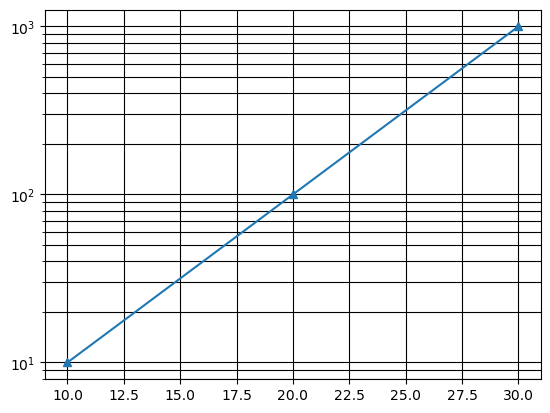

In [27]:
plt.plot([10,20,30],[10,100,1000],marker='^')
plt.yscale('log')

plt.grid(which='major',color='black',linestyle='-')
plt.grid(which='minor',color='black',linestyle='-')